<a href="https://colab.research.google.com/github/anumit-web/ML-Analytics-Portfolio-2024/blob/main/2.%20Sales%20Forecasting/Sales_Forecasting_time_series_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

time series

sales forecast

In [210]:
print('Hello')

Hello


In [211]:
from datetime import datetime
print(datetime.now())

2024-09-11 11:54:37.155081


In [212]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import TimeSeriesSplit
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import tensorflow as tf


In [213]:
data_df = pd.read_csv('train3.csv')

# Exploratory Data Analysis, EDA

In [214]:
rows, cols = data_df.shape
print("Dataset contains", rows, "rows and ", cols, "columns.\n")

Dataset contains 230090 rows and  4 columns.



In [215]:
data_df.head()

,Date,store,product,number_sold
0,2010-01-01,0,0,801
1,2010-01-02,0,0,810
2,2010-01-03,0,0,818
3,2010-01-04,0,0,796
4,2010-01-05,0,0,808


In [216]:
data_df.tail()

,Date,store,product,number_sold
230085,2018-12-27,6,9,890
230086,2018-12-28,6,9,892
230087,2018-12-29,6,9,895
230088,2018-12-30,6,9,899
230089,2018-12-31,6,9,912


In [217]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Date         230090 non-null  object
 1   store        230090 non-null  int64 
 2   product      230090 non-null  int64 
 3   number_sold  230090 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.0+ MB


In [218]:
data_df.describe()

,store,product,number_sold
count,230090.000000,230090.000000,230090.000000
mean,3.000000,4.500000,780.926107
std,2.000004,2.872288,204.096737
min,0.000000,0.000000,238.000000
25%,1.000000,2.000000,722.000000
50%,3.000000,4.500000,835.000000
75%,5.000000,7.000000,914.000000
max,6.000000,9.000000,1205.000000


In [219]:
# Convert the column to date type
data_df['Date'] = pd.to_datetime(data_df['Date'], format='%Y-%m-%d', errors='coerce')

In [220]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230090 entries, 0 to 230089
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Date         230090 non-null  datetime64[ns]
 1   store        230090 non-null  int64         
 2   product      230090 non-null  int64         
 3   number_sold  230090 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 7.0 MB


In [221]:
data_df.describe()

,Date,store,product,number_sold
count,230090,230090.000000,230090.000000,230090.000000
mean,2014-07-01 23:59:59.999999744,3.000000,4.500000,780.926107
min,2010-01-01 00:00:00,0.000000,0.000000,238.000000
25%,2012-04-01 00:00:00,1.000000,2.000000,722.000000
50%,2014-07-02 00:00:00,3.000000,4.500000,835.000000
75%,2016-10-01 00:00:00,5.000000,7.000000,914.000000
max,2018-12-31 00:00:00,6.000000,9.000000,1205.000000
std,NaN,2.000004,2.872288,204.096737


In [222]:
data_df.isnull().sum()

,0
Date,0
store,0
product,0
number_sold,0


In [223]:
data_df.agg(['min','max'])

,Date,store,product,number_sold
min,2010-01-01,0,0,238
max,2018-12-31,6,9,1205


In [224]:
data_df['store'].value_counts()

,count
store,
0,32870
1,32870
2,32870
3,32870
4,32870
5,32870
6,32870


In [225]:
data_df['product'].value_counts()

,count
product,
0,23009
1,23009
2,23009
3,23009
4,23009
5,23009
6,23009
7,23009
8,23009


In [226]:
data_df.groupby('store')['product'].value_counts(normalize=False)

store  product
0      0          3287
       1          3287
       9          3287
       8          3287
       7          3287
                  ... 
6      4          3287
       3          3287
       1          3287
       0          3287
       9          3287
Name: count, Length: 70, dtype: int64

seperator

In [227]:
data_df5 = data_df.copy()

In [228]:
data_df = data_df.query('store == 0')
data_df = data_df.query('product == 0')
print(data_df.shape)

(3287, 4)


In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

bar plot of store vs sales

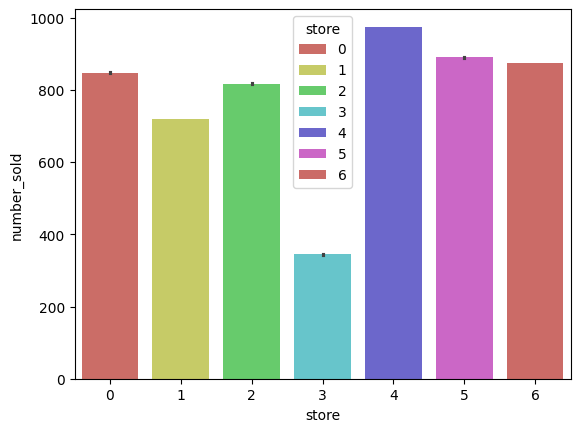

In [230]:
sns.barplot(x = "store", y = "number_sold", hue="store",  palette = 'hls', data = data_df5)
plt.show()

bar plot of products vs sales

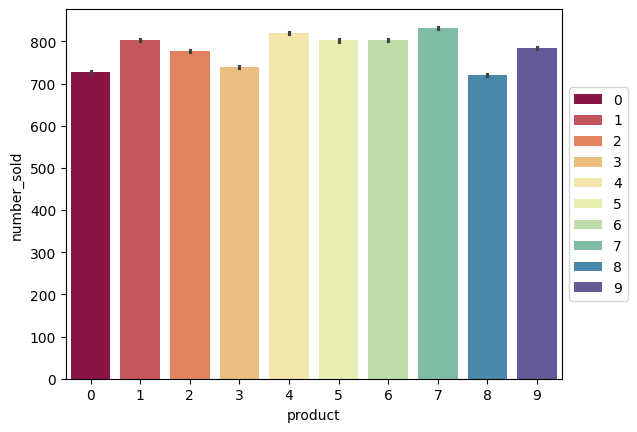

In [231]:
product_barplot = sns.barplot(x = "product", y = "number_sold", hue="product",
                              palette = 'Spectral', data = data_df5, legend = "full")
# move legend outside of bR plot
product_barplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

lineplot

In [232]:
data_df2 = data_df.groupby('Date')['number_sold'].sum()
data_df2 = data_df2.reset_index()
data_df2.head()

,Date,number_sold
0,2010-01-01,801
1,2010-01-02,810
2,2010-01-03,818
3,2010-01-04,796
4,2010-01-05,808


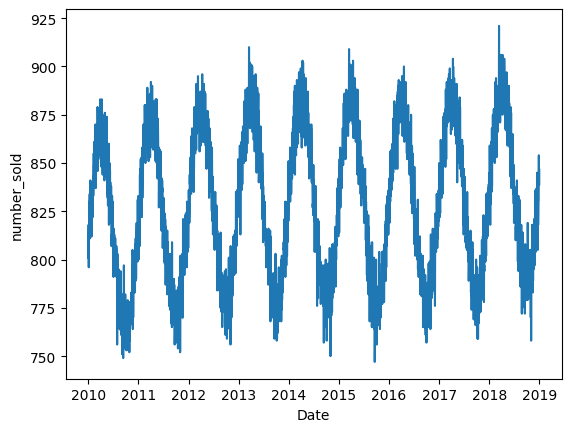

In [233]:
sns.lineplot(data=data_df2, x="Date", y="number_sold", legend="auto")
plt.show()

seperator

# Calculations and processing

In [234]:
data_df4 = data_df.copy()

In [235]:
scaler = MinMaxScaler(feature_range= (0, 1))
data_df4['number_sold_scaled'] = scaler.fit_transform(data_df4[['number_sold']])

In [236]:
data_df4.head()

,Date,store,product,number_sold,number_sold_scaled
0,2010-01-01,0,0,801,0.310345
1,2010-01-02,0,0,810,0.362069
2,2010-01-03,0,0,818,0.408046
3,2010-01-04,0,0,796,0.281609
4,2010-01-05,0,0,808,0.350575


seperator

In [237]:
tss = TimeSeriesSplit(n_splits = 4)

In [238]:
X = data_df4.drop(labels=['number_sold'], axis=1)
y = pd.DataFrame(data_df4['number_sold_scaled'])

X.shape, y.shape
X = X.set_index('Date')
X.shape, y.shape

((3287, 3), (3287, 1))

seperator

In [239]:
n_cols = 1
for train_index, test_index in tss.split(X):
    X_train, X_test = X.iloc[train_index, :], X.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2630, 3), (657, 3), (2630, 1), (657, 1))

<Axes: xlabel='Date'>

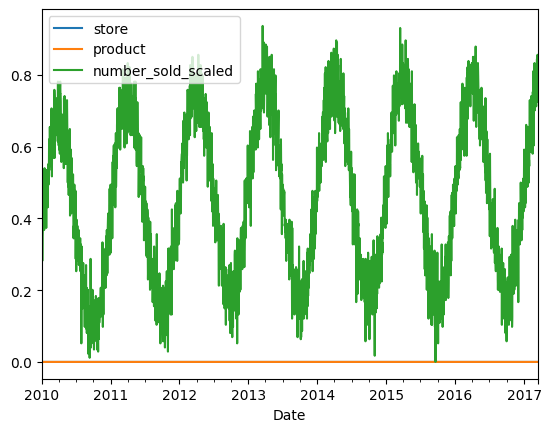

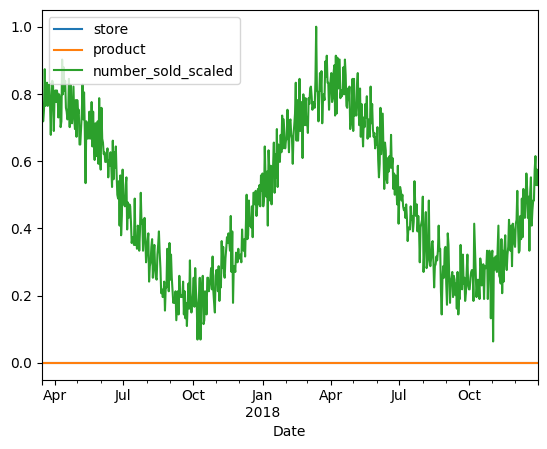

In [240]:
X_train.plot()
X_test.plot()

In [241]:
X_train

,store,product,number_sold_scaled
Date,,,
2010-01-01,0,0,0.310345
2010-01-02,0,0,0.362069
2010-01-03,0,0,0.408046
2010-01-04,0,0,0.281609
2010-01-05,0,0,0.350575
...,...,...,...
2017-03-10,0,0,0.844828
2017-03-11,0,0,0.775862
2017-03-12,0,0,0.770115


<Axes: >

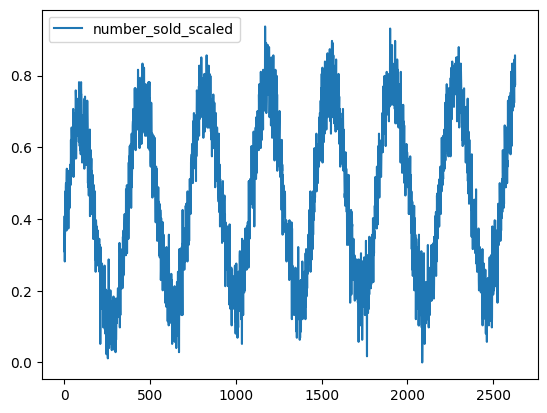

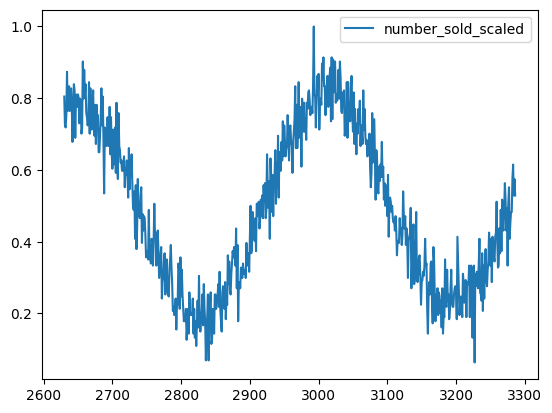

In [242]:
y_train.plot()
y_test.plot()

In [243]:
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(64, input_shape=(X_train.shape[1], n_cols), return_sequences=False),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(n_cols)
])

optimizer = tf.keras.optimizers.Adadelta(learning_rate=0.01)

model.compile(loss='huber',
              optimizer=optimizer,
              metrics=["mae"])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 64)                  │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,169 (90.50 KB)

 Trainable params: 23,169 (90.50 KB)

 Non-trainable params: 0 (0.00 B)

seperator

In [244]:
learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor='mae',
                                        patience=10,
                                        verbose=1,
                                        factor=0.5,
                                        min_lr=0.000003)

es = tf.keras.callbacks.EarlyStopping(monitor= 'mae',
                                      patience= 10 ,
                                      restore_best_weights= True,
                                      verbose=1)

callbacks = [learning_rate_reduction, es]

In [245]:
history = model.fit(x=X_train,
                    y=y_train,
                    epochs=125,
                    batch_size=16,
                    validation_data=(X_test, y_test),
                    verbose=2,
                    callbacks=[callbacks]
                   )

Epoch 1/125
165/165 - 3s - 21ms/step - loss: 0.1244 - mae: 0.4470 - val_loss: 0.1204 - val_mae: 0.4399 - learning_rate: 0.0100
Epoch 2/125
165/165 - 1s - 4ms/step - loss: 0.0916 - mae: 0.3684 - val_loss: 0.0820 - val_mae: 0.3452 - learning_rate: 0.0100
Epoch 3/125
165/165 - 1s - 5ms/step - loss: 0.0592 - mae: 0.2818 - val_loss: 0.0515 - val_mae: 0.2560 - learning_rate: 0.0100
Epoch 4/125
165/165 - 1s - 9ms/step - loss: 0.0368 - mae: 0.2209 - val_loss: 0.0325 - val_mae: 0.2019 - learning_rate: 0.0100
Epoch 5/125
165/165 - 1s - 7ms/step - loss: 0.0255 - mae: 0.1922 - val_loss: 0.0243 - val_mae: 0.1823 - learning_rate: 0.0100
Epoch 6/125
165/165 - 1s - 4ms/step - loss: 0.0216 - mae: 0.1811 - val_loss: 0.0213 - val_mae: 0.1760 - learning_rate: 0.0100
Epoch 7/125
165/165 - 1s - 8ms/step - loss: 0.0203 - mae: 0.1772 - val_loss: 0.0202 - val_mae: 0.1736 - learning_rate: 0.0100
Epoch 8/125
165/165 - 1s - 9ms/step - loss: 0.0198 - mae: 0.1753 - val_loss: 0.0196 - val_mae: 0.1720 - learning_rate

# Model Evaluation

Threshold for current model

Threshold for unscaled data

In [246]:
threshold_mae = (data_df4['number_sold'].max() - data_df4['number_sold'].min()) * 10/100
print(threshold_mae)

17.4


Threshold for scaled data

In [247]:
threshold_mae_scaled = (data_df4['number_sold_scaled'].max() - data_df4['number_sold_scaled'].min()) * 10/100
print(threshold_mae_scaled)

0.1


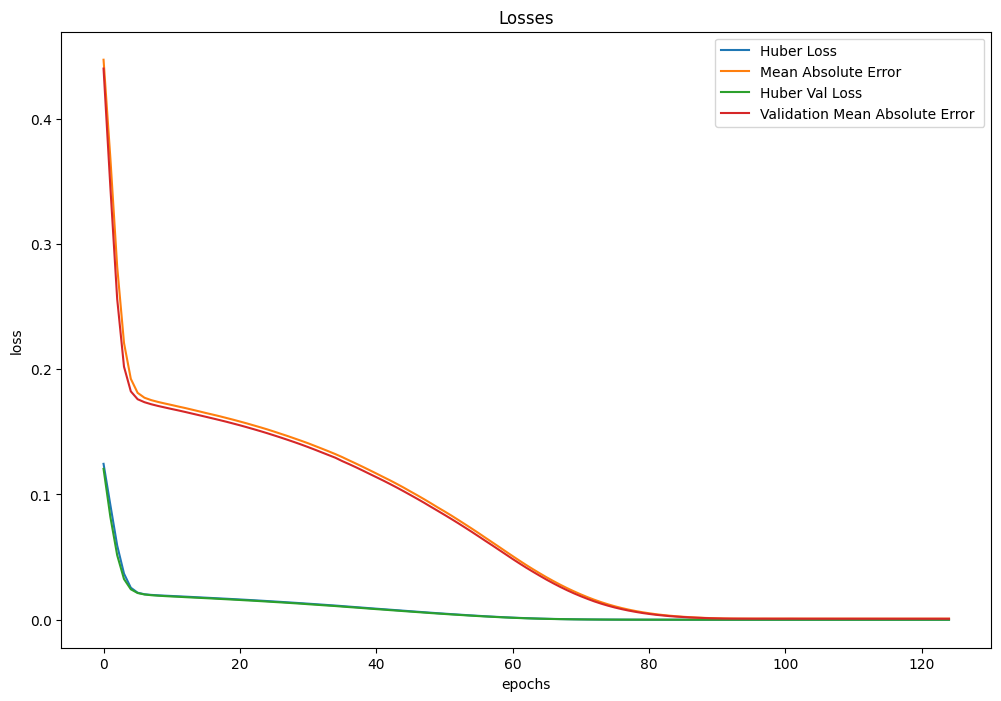

In [248]:
plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"])
plt.plot(history.history["mae"])
plt.plot(history.history["val_loss"])
plt.plot(history.history["val_mae"])
plt.legend(['Huber Loss','Mean Absolute Error', 'Huber Val Loss', 'Validation Mean Absolute Error '])
plt.title("Losses")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.show()

In [249]:
predictions = model.predict(X_test)

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


# Calculate MAE from predictions

MAE for scaled data

In [250]:
#Calculate MAE in scaled data
MAE = np.mean( np.abs(y_test - predictions)).round(2)
MAE

0.0

MAE for unscaled data

In [251]:
#inverse y_test scaling
predictions_unscaled = scaler.inverse_transform(predictions)
y_test_unscaled = scaler.inverse_transform(y_test)

MAE = np.mean( np.abs(y_test_unscaled - predictions_unscaled )).round(2)
MAE

0.14

The Validation MAE is 0 in scaled and 0.1 in unscaled data, which is far below the threshold (17.4)